# Введение в PyTorch

https://pytorch.org/docs/stable/index.html

https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e

# 1. Начало

In [27]:
import torch
import torchvision.datasets
import numpy as np
import random
import matplotlib.pyplot as plt

# инициализация случайных начальных чисел для воспроизведения результатов
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)  # для цпу
torch.cuda.manual_seed(0)  # для видеокарты
torch.backends.cudnn.deterministic = True

In [95]:
# Тензор - основной объект в pytorch
x = torch.tensor([[1,  2,  3,  4],
                  [5,  6,  7,  8],
                  [9, 10, 11, 12]])
x

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

In [96]:
x.dtype

torch.int64

In [97]:
# изменениетипа данных
x = x.float()
x.dtype

torch.float32

In [98]:
# копия
y = x.clone()
y

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

In [99]:
a = np.array([[1, 2, 3, 4],
              [4, 3, 2, 1]])

# тензор из эррея
torch.from_numpy(a)

tensor([[1, 2, 3, 4],
        [4, 3, 2, 1]], dtype=torch.int32)

In [100]:
# перевод в эррей numpy
x.numpy()

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]], dtype=float32)

# 2. Вычисления на видиокарте

In [101]:
x = torch.rand([2000,3000])
x

tensor([[0.4963, 0.7682, 0.0885,  ..., 0.2716, 0.3017, 0.0812],
        [0.3791, 0.4516, 0.2695,  ..., 0.0580, 0.5345, 0.3919],
        [0.9744, 0.2747, 0.1823,  ..., 0.0410, 0.7614, 0.3119],
        ...,
        [0.5352, 0.7720, 0.2989,  ..., 0.2992, 0.9614, 0.5976],
        [0.7179, 0.0086, 0.1462,  ..., 0.4658, 0.8344, 0.3744],
        [0.0487, 0.7462, 0.5584,  ..., 0.8609, 0.6781, 0.6064]])

In [102]:
# проверка наличия видеокарты. Если нет то можно в колабе изменить среду
torch.cuda.is_available()

False

In [103]:
# устройство видеокарты. 0 - берем первую, если карт несколько
torch.device('cuda:0')

device(type='cuda', index=0)

In [104]:
# устройство цпу
torch.device('cpu')

device(type='cpu')

In [105]:
# автоматический выбор
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [106]:
# перевод тензора на устройство (видеокарту)
x_cuda = x.to(device)
x_cuda

tensor([[0.4963, 0.7682, 0.0885,  ..., 0.2716, 0.3017, 0.0812],
        [0.3791, 0.4516, 0.2695,  ..., 0.0580, 0.5345, 0.3919],
        [0.9744, 0.2747, 0.1823,  ..., 0.0410, 0.7614, 0.3119],
        ...,
        [0.5352, 0.7720, 0.2989,  ..., 0.2992, 0.9614, 0.5976],
        [0.7179, 0.0086, 0.1462,  ..., 0.4658, 0.8344, 0.3744],
        [0.0487, 0.7462, 0.5584,  ..., 0.8609, 0.6781, 0.6064]])

In [107]:
# время вычислений на цпу
%time y = (x - x + x * 10.0) ** 2

Wall time: 69 ms


In [108]:
# время вычислений на gpu
%time y_cuda = (x_cuda - x_cuda + x_cuda * 10.0) ** 2

Wall time: 69 ms


# 3. Градиентный спуск

## Общее решение

In [109]:
# указывем requires_grad=True для вычисленя градиента. Показываем торчу что это не константа, а переменная
w = torch.tensor([[1.,2.],[4.,5.]], requires_grad=True)
# функция
function = 10 * torch.log(w + 1.).sum()
# Считает произодные функции
function.backward()
# Значение градиент
print(w.grad, '<- gradient')
# Данные тензора с requires_grad=False
print(w.data, '<- data')
# Градиентный шаг
w.data -= 0.001 * w.grad
print(w.data, '<- new data')
# Зануление градиентов
w.grad.zero_()

tensor([[5.0000, 3.3333],
        [2.0000, 1.6667]]) <- gradient
tensor([[1., 2.],
        [4., 5.]]) <- data
tensor([[0.9950, 1.9967],
        [3.9980, 4.9983]]) <- new data


tensor([[0., 0.],
        [0., 0.]])

## Через функции

In [110]:
x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

def function_parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    variable.data -= 0.001 * variable.grad
    variable.grad.zero_()

for i in range(500):
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

## Через оптимайзер

In [111]:
x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

optimizer = torch.optim.SGD([x], lr=0.001)

def function_parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    optimizer.step()
    optimizer.zero_grad()
    
for i in range(500):
    var_history.append(x.data.numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

In [112]:
def show_contours(objective,
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

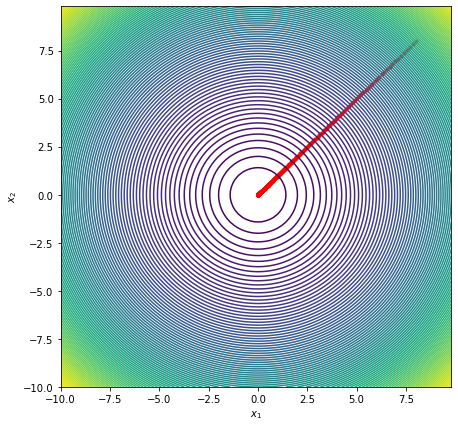

In [113]:
show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');

# 4. Нейронная сеть. Регрессия

Обучим сеть предсказывать функцию синуса

### Подготовка данных

In [114]:
plt.rcParams['figure.figsize'] = (13.0, 5.0)

In [115]:
# примердобавления оси
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


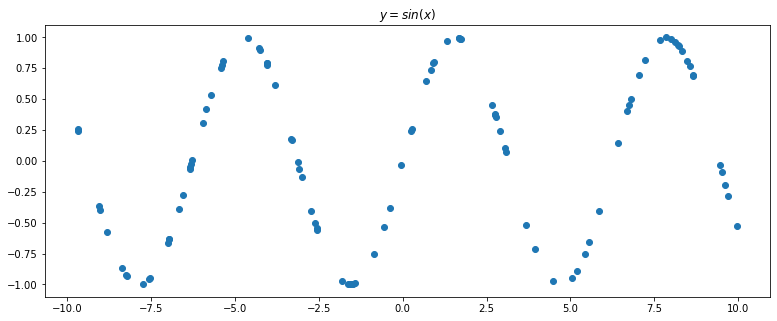

In [116]:
# тренировочные данные
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

# добавить ось
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

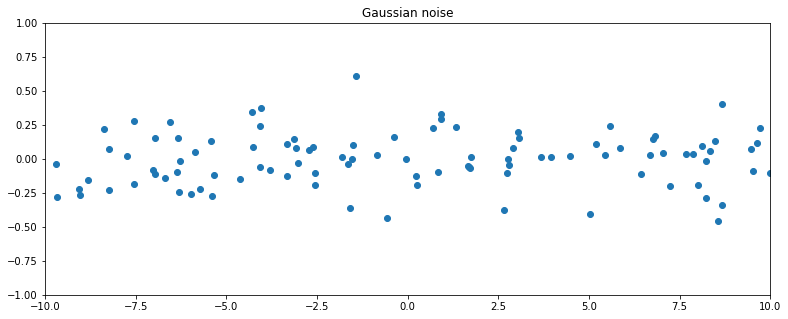

In [117]:
# Сгенерируем шум для данных
noise = torch.randn(y_train.shape) / 5.

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

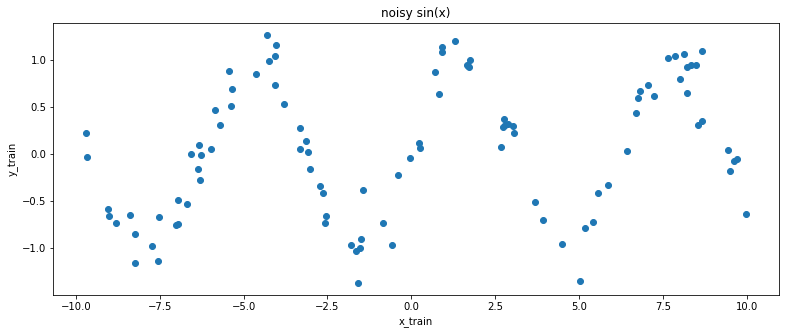

In [118]:
# добавим в данные шум
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

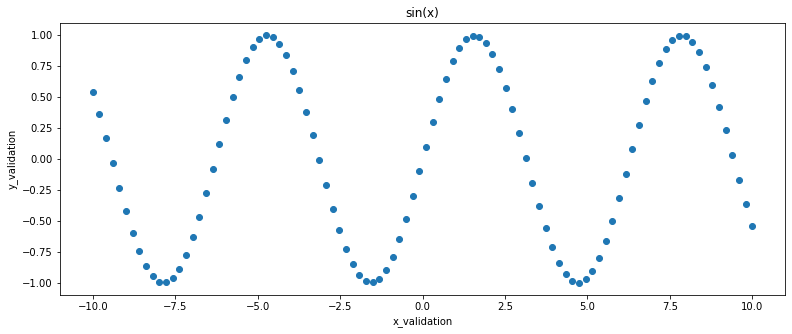

In [119]:
# валидационные данные
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)

x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

### Создание НС

In [130]:
# архитектура НС
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super().__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(50)

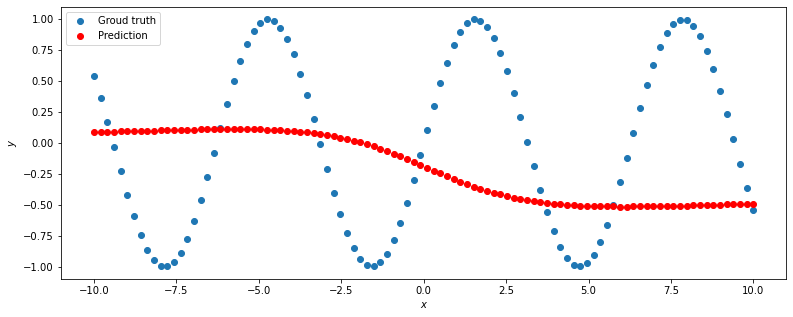

In [131]:
# предсказывание
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

In [132]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [133]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

### Процедура расчета

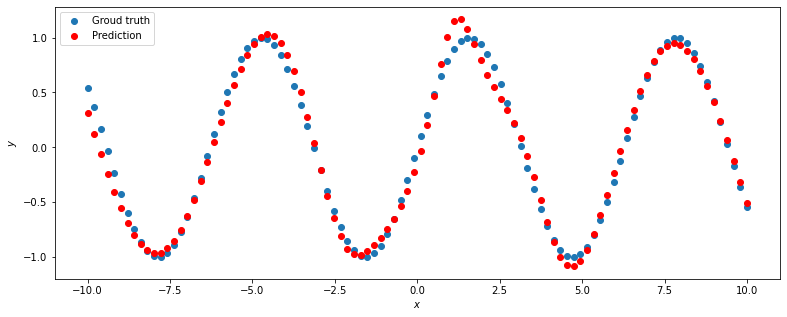

In [134]:
for epoch_index in range(2000):
    optimizer.zero_grad()
    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()
    optimizer.step()

predict(sine_net, x_validation, y_validation)

# 5. Сверточная НС. Рукописные цифры

In [11]:
# загрузка датасетов
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [46]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

In [48]:
print('Размер Train:', X_train.shape,'\nРазмер Test:', X_test.shape)

Размер Train: torch.Size([60000, 28, 28]) 
Размер Test: torch.Size([10000, 28, 28])


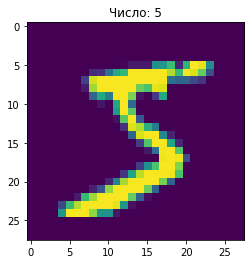

In [52]:
plt.imshow(X_train[0, :, :])
plt.title(f'Число: {y_train[0].item()}')
plt.show()

In [53]:
# добавим разменрость для каналов
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [54]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [55]:
class LeNet5(torch.nn.Module):
    def __init__(self,
                 activation='tanh',
                 pooling='avg',
                 conv_size=5,
                 use_batch_norm=False):
        super().__init__()
        
        self.conv_size = conv_size
        self.use_batch_norm = use_batch_norm
        
        if activation == 'tanh':
            activation_function = torch.nn.Tanh()
        elif activation == 'relu':
            activation_function  = torch.nn.ReLU()
        else:
            raise NotImplementedError
            
        if pooling == 'avg':
            pooling_layer = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        elif pooling == 'max':
            pooling_layer  = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        else:
            raise NotImplementedError
        
        if conv_size == 5:
            self.conv1 = torch.nn.Conv2d(
                in_channels=1, out_channels=6, kernel_size=5, padding=2)
        elif conv_size == 3:
            self.conv1_1 = torch.nn.Conv2d(
                in_channels=1, out_channels=6, kernel_size=3, padding=1)
            self.conv1_2 = torch.nn.Conv2d(
                in_channels=6, out_channels=6, kernel_size=3, padding=1)
        else:
            raise NotImplementedError

        self.act1 = activation_function
        self.bn1 = torch.nn.BatchNorm2d(num_features=6)
        self.pool1 = pooling_layer
       
        if conv_size == 5:
            self.conv2 = torch.nn.Conv2d(
                in_channels=6, out_channels=16, kernel_size=5, padding=0)
        elif conv_size == 3:
            self.conv2_1 = torch.nn.Conv2d(
                in_channels=6, out_channels=16, kernel_size=3, padding=0)
            self.conv2_2 = torch.nn.Conv2d(
                in_channels=16, out_channels=16, kernel_size=3, padding=0)
        else:
            raise NotImplementedError

        self.act2 = activation_function
        self.bn2 = torch.nn.BatchNorm2d(num_features=16)
        self.pool2 = pooling_layer
        
        self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3 = activation_function
    
        self.fc2 = torch.nn.Linear(120, 84)
        self.act4 = activation_function
        
        self.fc3 = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        if self.conv_size == 5:
            x = self.conv1(x)
        elif self.conv_size == 3:
            x = self.conv1_2(self.conv1_1(x))
        x = self.act1(x)
        if self.use_batch_norm:
            x = self.bn1(x)
        x = self.pool1(x)
        
        if self.conv_size == 5:
            x = self.conv2(x)
        elif self.conv_size == 3:
            x = self.conv2_2(self.conv2_1(x))
        x = self.act2(x)
        if self.use_batch_norm:
            x = self.bn2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x

In [56]:
def train(net, X_train, y_train, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)
    
    batch_size = 100

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(30):
        order = np.random.permutation(len(X_train))
        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch) 

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()

        net.eval()
        test_preds = net.forward(X_test)
        test_loss_history.append(loss(test_preds, y_test).data.cpu())

        accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
        test_accuracy_history.append(accuracy)

        print(accuracy)
    print('---------------')
    return test_accuracy_history, test_loss_history

accuracies = {}
losses = {}


accuracies['tanh'], losses['tanh'] = \
    train(LeNet5(activation='tanh', conv_size=5),
          X_train, y_train, X_test, y_test)

accuracies['relu'], losses['relu'] = \
    train(LeNet5(activation='relu', conv_size=5),
          X_train, y_train, X_test, y_test)

accuracies['relu_3'], losses['relu_3'] = \
    train(LeNet5(activation='relu', conv_size=3),
          X_train, y_train, X_test, y_test)

accuracies['relu_3_max_pool'], losses['relu_3_max_pool'] = \
    train(LeNet5(activation='relu', conv_size=3, pooling='max'), 
          X_train, y_train, X_test, y_test)

accuracies['relu_3_max_pool_bn'], losses['relu_3_max_pool_bn'] = \
    train(LeNet5(activation='relu', conv_size=3, pooling='max', use_batch_norm=True), 
          X_train, y_train, X_test, y_test)

tensor(0.9756)
tensor(0.9830)
tensor(0.9858)
tensor(0.9870)
tensor(0.9857)
tensor(0.9864)
tensor(0.9887)


KeyboardInterrupt: 

No handles with labels found to put in legend.


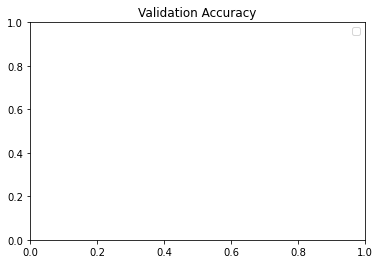

In [57]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy');

In [ ]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss');